In [1]:
# Setup libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime




In [3]:
# Optional: For modeling

from sklearn.cluster import KMeans
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [4]:
# Load the dataset

df = pd.read_csv("Desktop/vrinda_store_cleaned.csv")


In [5]:
df

,order_id,cust_id,gender,age,date,status,channel,sku,category,size,...,amount,ship_city,ship_state,ship_postal_code,ship_country,b2b,year,month,month_name,month_year
0,171-1029312-3038738,1029312,Women,44,04-12-2022,Delivered,Myntra,JNE1233-BLUE-KR-031-XXL,kurta,XXL,...,376,MOHALI,PUNJAB,140301,IN,False,2022,12,December,2022-12
1,405-2183842-2225946,2183842,Women,29,04-12-2022,Delivered,Ajio,SET414-KR-NP-L,Set,L,...,1449,GURUGRAM,HARYANA,122002,IN,False,2022,12,December,2022-12
2,171-1641533-8921966,1641533,Women,67,04-12-2022,Delivered,Myntra,SET261-KR-PP-S,Set,S,...,453,KOLKATA,WEST BENGAL,700029,IN,False,2022,12,December,2022-12
3,404-7490807-6300351,7490807,Women,20,04-12-2022,Delivered,Amazon,SET110-KR-PP-M,Set,M,...,729,THANJAVUR,TAMIL NADU,613007,IN,False,2022,12,December,2022-12
4,403-9293516-4577154,9293516,Women,62,04-12-2022,Delivered,Myntra,JNE2294-KR-A-XXL,kurta,XXL,...,544,GURUGRAM,HARYANA,122001,IN,False,2022,12,December,2022-12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31042,405-4724097-1016369,4724097,Men,60,06-01-2022,Delivered,Flipkart,J0083-KR-XL,kurta,XL,...,565,PUNE,MAHARASHTRA,412307,IN,False,2022,1,January,2022-01
31043,405-4724097-1016369,4724097,Men,34,06-01-2022,Delivered,Myntra,J0010-LCD-S,Set,S,...,939,BENGALURU,KARNATAKA,560061,IN,False,2022,1,January,2022-01
31044,408-3572295-5992330,3572295,Men,29,06-01-2022,Delivered,Amazon,SET398-KR-PP-L,Set,L,...,1115,PITHORAGARH,UTTARAKHAND,262501,IN,False,2022,1,January,2022-01
31045,405-1423498-9705162,1423498,Men,46,06-01-2022,Delivered,Amazon,JNE3568-KR-M,kurta,M,...,399,DHULE,MAHARASHTRA,424006,IN,False,2022,1,January,2022-01


In [6]:
# Display basic information and preview
df_info = df.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31047 entries, 0 to 31046
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   order_id          31047 non-null  object
 1   cust_id           31047 non-null  int64 
 2   gender            31047 non-null  object
 3   age               31047 non-null  int64 
 4   date              31047 non-null  object
 5   status            31047 non-null  object
 6   channel           31047 non-null  object
 7   sku               31047 non-null  object
 8   category          31047 non-null  object
 9   size              31047 non-null  object
 10  qty               31047 non-null  int64 
 11  currency          31047 non-null  object
 12  amount            31047 non-null  int64 
 13  ship_city         31047 non-null  object
 14  ship_state        31047 non-null  object
 15  ship_postal_code  31047 non-null  int64 
 16  ship_country      31047 non-null  object
 17  b2b         

In [7]:
# Display only 5 row  
df_head = df.head(10)
print(df_head)


              order_id  cust_id gender  age        date     status   channel  \
0  171-1029312-3038738  1029312  Women   44  04-12-2022  Delivered    Myntra   
1  405-2183842-2225946  2183842  Women   29  04-12-2022  Delivered      Ajio   
2  171-1641533-8921966  1641533  Women   67  04-12-2022  Delivered    Myntra   
3  404-7490807-6300351  7490807  Women   20  04-12-2022  Delivered    Amazon   
4  403-9293516-4577154  9293516  Women   62  04-12-2022  Delivered    Myntra   
5  407-1298130-0368305  1298130    Men   49  04-12-2022  Delivered  Flipkart   
6  407-1298130-0368305  1298130  Women   23  04-12-2022  Delivered    Meesho   
7  171-5561216-3398711  5561216  Women   70  04-12-2022  Delivered    Others   
8  408-2935263-2935550  2935263  Women   75  04-12-2022  Delivered    Amazon   
9  404-2648970-9042715  2648970  Women   43  04-12-2022  Delivered    Myntra   

                       sku       category size  ...  amount  \
0  JNE1233-BLUE-KR-031-XXL          kurta  XXL  ...     

In [8]:
df_tail= df.tail(5)
print(df_tail)

                  order_id  cust_id gender  age        date     status  \
31042  405-4724097-1016369  4724097    Men   60  06-01-2022  Delivered   
31043  405-4724097-1016369  4724097    Men   34  06-01-2022  Delivered   
31044  408-3572295-5992330  3572295    Men   29  06-01-2022  Delivered   
31045  405-1423498-9705162  1423498    Men   46  06-01-2022  Delivered   
31046  408-4694875-8249153  4694875    Men   36  06-01-2022  Delivered   

        channel             sku       category size  ...  amount    ship_city  \
31042  Flipkart     J0083-KR-XL          kurta   XL  ...     565         PUNE   
31043    Myntra     J0010-LCD-S            Set    S  ...     939    BENGALURU   
31044    Amazon  SET398-KR-PP-L            Set    L  ...    1115  PITHORAGARH   
31045    Amazon    JNE3568-KR-M          kurta    M  ...     399        DHULE   
31046  Flipkart   J0341-DR-XXXL  Western Dress  3XL  ...     791     WARANGAL   

        ship_state ship_postal_code ship_country    b2b  year  month

In [9]:
df_describe=df.describe()
print(df.describe())

            cust_id           age           qty        amount  \
count  3.104700e+04  31047.000000  31047.000000  31047.000000   
mean   4.936824e+06     39.496570      1.004670    682.074822   
std    2.900678e+06     15.117233      0.096369    268.582173   
min    8.950000e+02     18.000000      0.000000    229.000000   
25%    2.416471e+06     28.000000      1.000000    486.000000   
50%    4.909885e+06     37.000000      1.000000    646.000000   
75%    7.454182e+06     47.000000      1.000000    794.000000   
max    9.999233e+06     78.000000      5.000000   3036.000000   

       ship_postal_code     year         month  
count      31047.000000  31047.0  31047.000000  
mean      460474.587206   2022.0      6.329951  
std       198116.733009      0.0      3.436028  
min       110001.000000   2022.0      1.000000  
25%       313001.000000   2022.0      3.000000  
50%       500028.000000   2022.0      6.000000  
75%       600040.000000   2022.0      9.000000  
max       855117.00000

In [10]:
df

,order_id,cust_id,gender,age,date,status,channel,sku,category,size,...,amount,ship_city,ship_state,ship_postal_code,ship_country,b2b,year,month,month_name,month_year
0,171-1029312-3038738,1029312,Women,44,04-12-2022,Delivered,Myntra,JNE1233-BLUE-KR-031-XXL,kurta,XXL,...,376,MOHALI,PUNJAB,140301,IN,False,2022,12,December,2022-12
1,405-2183842-2225946,2183842,Women,29,04-12-2022,Delivered,Ajio,SET414-KR-NP-L,Set,L,...,1449,GURUGRAM,HARYANA,122002,IN,False,2022,12,December,2022-12
2,171-1641533-8921966,1641533,Women,67,04-12-2022,Delivered,Myntra,SET261-KR-PP-S,Set,S,...,453,KOLKATA,WEST BENGAL,700029,IN,False,2022,12,December,2022-12
3,404-7490807-6300351,7490807,Women,20,04-12-2022,Delivered,Amazon,SET110-KR-PP-M,Set,M,...,729,THANJAVUR,TAMIL NADU,613007,IN,False,2022,12,December,2022-12
4,403-9293516-4577154,9293516,Women,62,04-12-2022,Delivered,Myntra,JNE2294-KR-A-XXL,kurta,XXL,...,544,GURUGRAM,HARYANA,122001,IN,False,2022,12,December,2022-12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31042,405-4724097-1016369,4724097,Men,60,06-01-2022,Delivered,Flipkart,J0083-KR-XL,kurta,XL,...,565,PUNE,MAHARASHTRA,412307,IN,False,2022,1,January,2022-01
31043,405-4724097-1016369,4724097,Men,34,06-01-2022,Delivered,Myntra,J0010-LCD-S,Set,S,...,939,BENGALURU,KARNATAKA,560061,IN,False,2022,1,January,2022-01
31044,408-3572295-5992330,3572295,Men,29,06-01-2022,Delivered,Amazon,SET398-KR-PP-L,Set,L,...,1115,PITHORAGARH,UTTARAKHAND,262501,IN,False,2022,1,January,2022-01
31045,405-1423498-9705162,1423498,Men,46,06-01-2022,Delivered,Amazon,JNE3568-KR-M,kurta,M,...,399,DHULE,MAHARASHTRA,424006,IN,False,2022,1,January,2022-01


In [12]:
# Extract column names and data types
column_info = df.dtypes.reset_index()
print(column_info)




               index       0
0           order_id  object
1            cust_id   int64
2             gender  object
3                age   int64
4               date  object
5             status  object
6            channel  object
7                sku  object
8           category  object
9               size  object
10               qty   int64
11          currency  object
12            amount   int64
13         ship_city  object
14        ship_state  object
15  ship_postal_code   int64
16      ship_country  object
17               b2b    bool
18              year   int64
19             month   int64
20        month_name  object
21        month_year  object


In [13]:
column_info.columns = ['Column', 'Data Type']
print(column_info.columns )

Index(['Column', 'Data Type'], dtype='object')


In [14]:
# Save to examine structure for notebook creation
df_shape = df.shape
df_columns = df.columns.tolist()

df_shape, column_info

((31047, 22),
               Column Data Type
 0           order_id    object
 1            cust_id     int64
 2             gender    object
 3                age     int64
 4               date    object
 5             status    object
 6            channel    object
 7                sku    object
 8           category    object
 9               size    object
 10               qty     int64
 11          currency    object
 12            amount     int64
 13         ship_city    object
 14        ship_state    object
 15  ship_postal_code     int64
 16      ship_country    object
 17               b2b      bool
 18              year     int64
 19             month     int64
 20        month_name    object
 21        month_year    object)

In [16]:
# Data Cleaning 
print(df['date'].isnull())

print(df['order_id'].isnull())

0        False
1        False
2        False
3        False
4        False
         ...  
31042    False
31043    False
31044    False
31045    False
31046    False
Name: date, Length: 31047, dtype: bool
0        False
1        False
2        False
3        False
4        False
         ...  
31042    False
31043    False
31044    False
31045    False
31046    False
Name: order_id, Length: 31047, dtype: bool


In [19]:
print(df.isnull().sum())

order_id            0
cust_id             0
gender              0
age                 0
date                0
status              0
channel             0
sku                 0
category            0
size                0
qty                 0
currency            0
amount              0
ship_city           0
ship_state          0
ship_postal_code    0
ship_country        0
b2b                 0
year                0
month               0
month_name          0
month_year          0
dtype: int64



1.Sales over time (monthly, quarterly).\
2.Top selling products/categories.\
3.Customer purchase behavior.\
4.Shipping method analysis.



In [30]:
df.head(50)

,order_id,cust_id,gender,age,date,status,channel,sku,category,size,...,amount,ship_city,ship_state,ship_postal_code,ship_country,b2b,year,month,month_name,month_year
0,171-1029312-3038738,1029312,Women,44,04-12-2022,Delivered,Myntra,JNE1233-BLUE-KR-031-XXL,kurta,XXL,...,376,MOHALI,PUNJAB,140301,IN,False,2022,12,December,2022-12
1,405-2183842-2225946,2183842,Women,29,04-12-2022,Delivered,Ajio,SET414-KR-NP-L,Set,L,...,1449,GURUGRAM,HARYANA,122002,IN,False,2022,12,December,2022-12
2,171-1641533-8921966,1641533,Women,67,04-12-2022,Delivered,Myntra,SET261-KR-PP-S,Set,S,...,453,KOLKATA,WEST BENGAL,700029,IN,False,2022,12,December,2022-12
3,404-7490807-6300351,7490807,Women,20,04-12-2022,Delivered,Amazon,SET110-KR-PP-M,Set,M,...,729,THANJAVUR,TAMIL NADU,613007,IN,False,2022,12,December,2022-12
4,403-9293516-4577154,9293516,Women,62,04-12-2022,Delivered,Myntra,JNE2294-KR-A-XXL,kurta,XXL,...,544,GURUGRAM,HARYANA,122001,IN,False,2022,12,December,2022-12
5,407-1298130-0368305,1298130,Men,49,04-12-2022,Delivered,Flipkart,JNE3797-KR-XXL,Western Dress,XXL,...,735,SANGLI MIRAJ KUPWAD,MAHARASHTRA,416436,IN,False,2022,12,December,2022-12
6,407-1298130-0368305,1298130,Women,23,04-12-2022,Delivered,Meesho,JNE3801-KR-XXL,kurta,XXL,...,735,BENGALURU,KARNATAKA,560029,IN,False,2022,12,December,2022-12
7,171-5561216-3398711,5561216,Women,70,04-12-2022,Delivered,Others,JNE3405-KR-M,kurta,M,...,435,GURUGRAM,HARYANA,122001,IN,False,2022,12,December,2022-12
8,408-2935263-2935550,2935263,Women,75,04-12-2022,Delivered,Amazon,JNE3474-KR-E-XL,kurta,XL,...,385,BENGALURU,KARNATAKA,562149,IN,False,2022,12,December,2022-12
9,404-2648970-9042715,2648970,Women,43,04-12-2022,Delivered,Myntra,JNE3466-KR-L,kurta,L,...,771,VIJAYAWADA,ANDHRA PRADESH,520002,IN,False,2022,12,December,2022-12


In [32]:
# Find out the null values
print(df['amount'].isna().sum())



0


 Sales Analysis

In [37]:

#What is total revenue by product category?
revenue_by_category = df.groupby('category')['amount'].sum().sort_values(ascending=False)
print(revenue_by_category)


category
Set              10507546
kurta             4959377
Western Dress     3148836
Top               1186199
Saree             1010471
Ethnic Dress       195256
Blouse             140888
Bottom              27804
Name: amount, dtype: int64


In [35]:
#What is the total sales amount?

total_sales = df['amount'].sum()
print("Total Sales Amount:", total_sales)

Total Sales Amount: 21176377


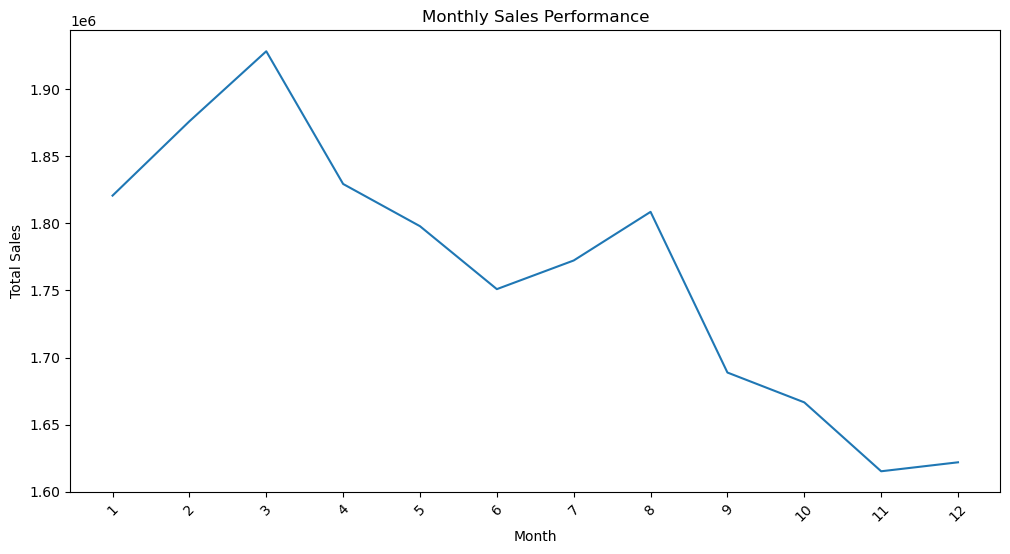

Sales have shown trends over months, identifying growth or decline phases.


In [77]:
#  Overall sales performance over time
monthly_sales = df.groupby('month')['amount'].sum().reset_index()
monthly_sales['month'] = monthly_sales['month'].astype(str)

plt.figure(figsize=(12,6))
sns.lineplot(data=monthly_sales, x='month', y='amount')
plt.title('Monthly Sales Performance')
plt.xticks(rotation=45)
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.show()

print("Sales have shown trends over months, identifying growth or decline phases.")


C:\Users\Dell\AppData\Local\Temp\ipykernel_9916\1534493239.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=category_sales.index, y=category_sales.values, palette='magma')


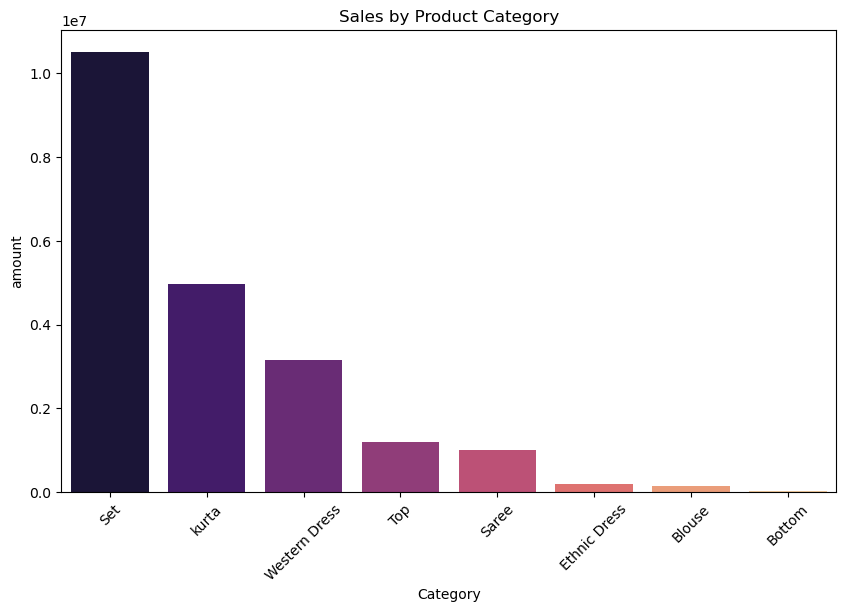

 Categories SET, KURTA, WESTERN DRESS are the highest revenue generators.


In [79]:
#Top product categories by revenue
category_sales = df.groupby('category')['amount'].sum().sort_values(ascending=False)

plt.figure(figsize=(10,6))
sns.barplot(x=category_sales.index, y=category_sales.values, palette='magma')
plt.title('Sales by Product Category')
plt.xlabel('Category')
plt.ylabel('amount')
plt.xticks(rotation=45)
plt.show()

print(" Categories SET, KURTA, WESTERN DRESS are the highest revenue generators.")

In [81]:
#What is the total quantity sold?
total_quntity = df['qty'].sum()
print("Total Quntity:", total_quntity)

Total Quntity: 31192


In [83]:
# Top 10 Customers by Revenue
top_customers = df.groupby('cust_id')['amount'].sum().sort_values(ascending=False).head(10)
print("Top 10 Customers by Total Sales:")
print(top_customers)


Top 10 Customers by Total Sales:
cust_id
4410167    6818
4984515    6489
9984530    5924
3478381    5554
173977     5414
3701762    5411
3363121    5105
7871794    4766
9724970    4431
8678391    4419
Name: amount, dtype: int64


In [85]:
 #Aggregate customer data: total spent and order count
customer_stats = df.groupby('cust_id').agg({
    'amount': 'sum',
    'order_id': 'count'
}).rename(columns={'amount': 'total_spent', 'order_id': 'order_count'})

In [87]:
#KMeans clustering with 3 clusters
kmeans = KMeans(n_clusters=3, random_state=42)
customer_stats['cluster'] = kmeans.fit_predict(customer_stats)



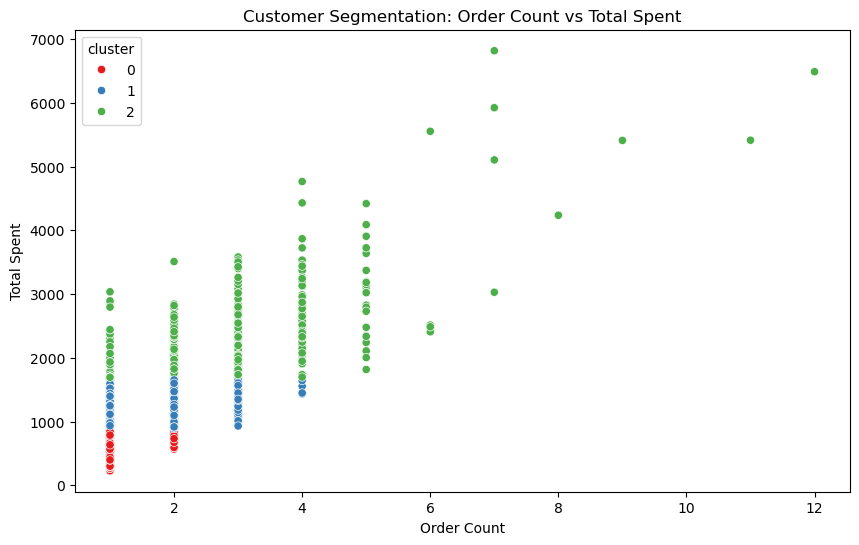

Cluster 0 (red)shows our most loyal and high-value customers :we should give them early access to new products.
Cluster 1 (blue)contains customers with high spend but few orders : try to turn them into repeat buyers.
Cluster 2 (green)has many orders but low spend :consider upsell strategies.


In [121]:
# Plot clusters
plt.figure(figsize=(10,6))
sns.scatterplot(data=customer_stats, x='order_count', y='total_spent', hue='cluster', palette='Set1')
plt.title('Customer Segmentation: Order Count vs Total Spent')
plt.xlabel('Order Count')
plt.ylabel('Total Spent')
plt.show()

print("Cluster 0 (red)shows our most loyal and high-value customers :we should give them early access to new products.")
print("Cluster 1 (blue)contains customers with high spend but few orders : try to turn them into repeat buyers.")
print("Cluster 2 (green)has many orders but low spend :consider upsell strategies.")




In [52]:
#Summary insights (print or save to file)
summary = {
    'total_sales': df['amount'].sum(),
    'unique_customers': df['cust_id'].nunique(),
    'unique_products': df['sku'].nunique(),
    'time_range': (df['date'].min(), df['date'].max())
}
print("\nSummary Insights:")
for k, v in summary.items():
    print(f"{k}: {v}")


Summary Insights:
total_sales: 21176377
unique_customers: 28437
unique_products: 5287
time_range: ('04-01-2022', '06-12-2022')


In [57]:
#Top customers by revenue and frequency
top_customers_revenue = df.groupby('cust_id')['amount'].sum().sort_values(ascending=False).head(10)
top_customers_freq = df.groupby('cust_id')['order_id'].count().sort_values(ascending=False).head(10)

print("Top 10 customers by revenue:")
print(top_customers_revenue)

print("Top 10 customers by order frequency:")
print(top_customers_freq)

Top 10 customers by revenue:
cust_id
4410167    6818
4984515    6489
9984530    5924
3478381    5554
173977     5414
3701762    5411
3363121    5105
7871794    4766
9724970    4431
8678391    4419
Name: amount, dtype: int64
Top 10 customers by order frequency:
cust_id
4984515    12
173977     11
3701762     9
2997706     8
3363121     7
4410167     7
9984530     7
561446      7
3478381     6
894915      6
Name: order_id, dtype: int64


C:\Users\Dell\AppData\Local\Temp\ipykernel_9916\2111489348.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=category_sales, x='amount', y='category', palette='viridis')


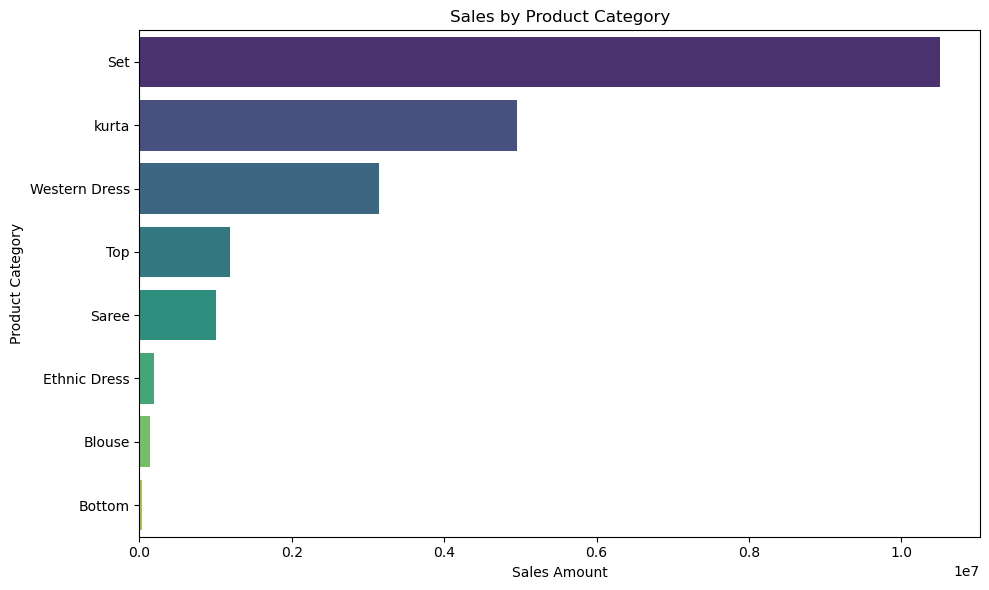

In [59]:
# Aggregate sales by category
category_sales = df.groupby('category')['amount'].sum().sort_values(ascending=False).reset_index()

# Plot
plt.figure(figsize=(10,6))
sns.barplot(data=category_sales, x='amount', y='category', palette='viridis')
plt.title('Sales by Product Category')
plt.xlabel('Sales Amount')
plt.ylabel('Product Category')
plt.tight_layout()
plt.savefig('category_sales.png')
plt.show()


C:\Users\Dell\AppData\Local\Temp\ipykernel_9916\4091877447.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_customers, x='amount', y='cust_id', palette='magma')


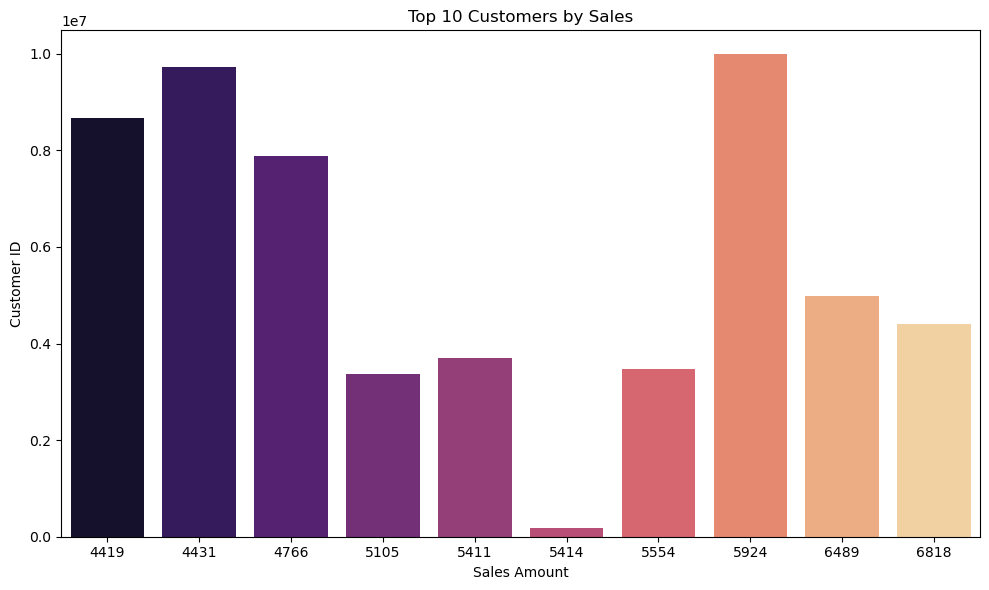

In [61]:
# Top 10 customers by sales
top_customers = df.groupby('cust_id')['amount'].sum().sort_values(ascending=False).head(10).reset_index()

# Plot
plt.figure(figsize=(10,6))
sns.barplot(data=top_customers, x='amount', y='cust_id', palette='magma')
plt.title('Top 10 Customers by Sales')
plt.xlabel('Sales Amount')
plt.ylabel('Customer ID')
plt.tight_layout()
plt.savefig('top_customers.png')
plt.show()
